### Fitting and interpolation

#### Taylor Series expansion:


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math
def expTaylor(x, x0, nmax):
    """Arguments:
    x(float32): variable of function,
    x0(float32): Central point,
    nmax(int): Series terminate point"""
    t = 0
    for n in range(nmax + 1):
        t = t + np.exp(x0)*(x-x0)**n / math.factorial(n)
    return t

1. Truncation errors occur when an infinite series is approximated by a finite number of terms. In physics, if we approximate the position of a falling object using only the first few terms of its Taylor series expansion, we introduce truncation errors.
2. Rounding errors occur due to the finite precision with which computers store numbers. For example, representing the number 𝜋 as 3.14 introduces a rounding error because the true value of 𝜋 is approximately 3.14159. When calculating the trajectory of a spacecraft, rounding errors in the representation of distances and velocities can accumulate, affecting the final result.

1. Error propagation refers to how errors in input data affect the final result.
2. Suppose we have a function f(x) and we approximate x as x_prime with small error &x. The Taylor series expansion gives:

$$ f(\tilde{x}) = f(x + \delta x) = f(x) + \frac{df}{dx}\delta x + \frac{d2f}{dx2}\frac{(\delta x)^2}{2!} + \cdots $$

If we measure the radius of a circle with small error of &r, the error propagates to the calculated area A = pi*r*r as:
&A = 2*pi*r*&r


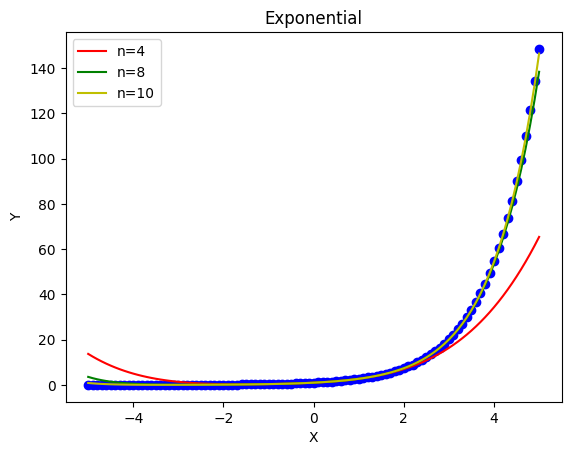

In [34]:
x = np.linspace(-5, 5, 101)
plt.scatter(x, np.exp(x),c= 'blue')
plt.plot(x, expTaylor(x, 0, 4), 'red',label= 'n=4')
plt.plot(x, expTaylor(x, 0, 8), 'green',label= 'n=8')
plt.plot(x, expTaylor(x, 0, 10), 'y',label= 'n=10')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Exponential")
plt.legend()

In [35]:
def calculate_error(true_value, approximation):
    """Calculates the absolute and relative errors."""
    absolute_error = abs(true_value - approximation)
    relative_error = absolute_error / abs(true_value) if true_value != 0 else float('inf')
    return absolute_error, relative_error

x = 1
absolute_error, relative_error = calculate_error(np.exp(x), expTaylor(x, 0, 8))
print(f"Absolute Error: {absolute_error}")
print(f"Relative Error: {relative_error}")


def error_propogation_analysis(x, max_terms):
    true_value = math.exp(x)
    absolute_errors = []
    relative_errors = []
    
    for num_terms in range(1, max_terms + 1):
        approximation = expTaylor(x, 0, num_terms)
        absolute_error, relative_error = calculate_error(true_value, approximation)
        absolute_errors.append(absolute_error)
        relative_errors.append(relative_error)
        
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(1, max_terms + 1), absolute_errors, marker='o', color='b', label='Absolute Error')
    plt.xlabel('Number of Terms')
    plt.ylabel('Absolute Error')
    plt.title(f'Absolute Error Propagation for e^{x}')
    plt.yscale('log')  # Logarithmic scale for better visualization
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, max_terms + 1), relative_errors, marker='o', color='r', label='Relative Error')
    plt.xlabel('Number of Terms')
    plt.ylabel('Relative Error')
    plt.title(f'Relative Error Propagation for e^{x}')
    plt.yscale('log')  # Logarithmic scale for better visualization
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    

Absolute Error: 3.0586177750535626e-06
Relative Error: 1.125202597843745e-06


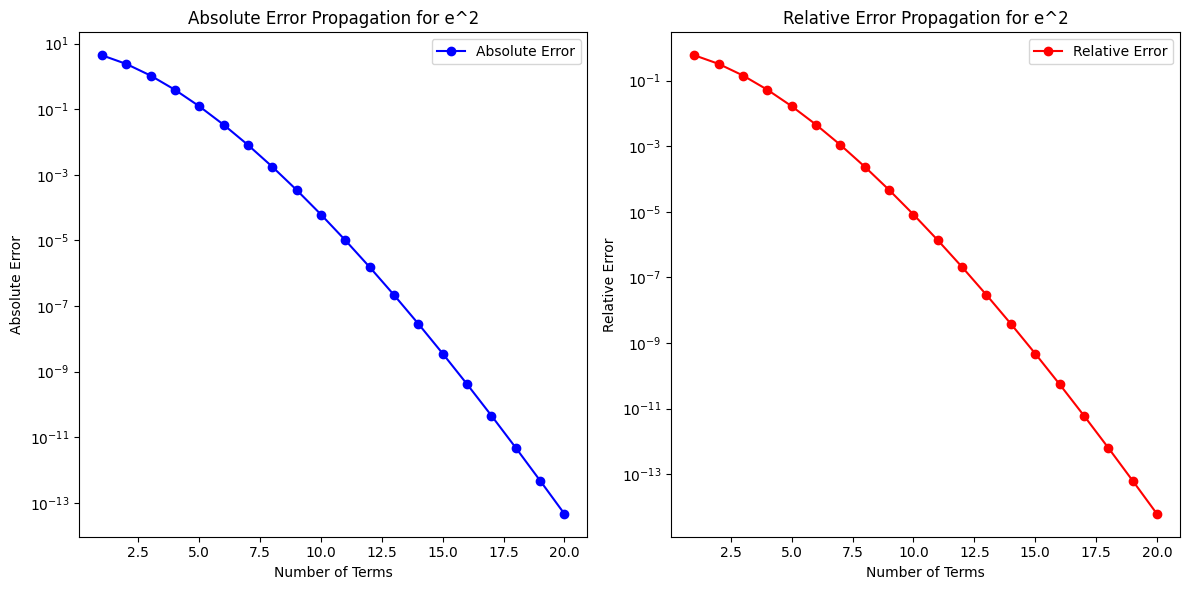

In [36]:
error_propogation_analysis(2, 20)

### Interpolation

##### Linear Interpolation

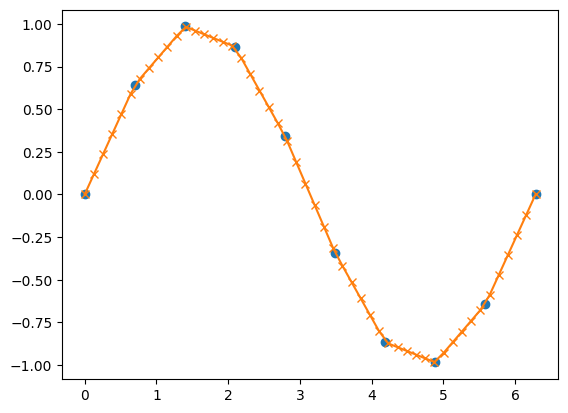

In [37]:
x_pts = np.linspace(0, 2*np.pi, 10)  ## 10 equidistant x coordinates from 0 to 10
y_pts = np.sin(x_pts)
x_vals = np.linspace(0, 2*np.pi, 50)  ## 50 desired points
y_vals = np.interp(x_vals, x_pts, y_pts)

plt.plot(x_pts, y_pts, 'o')  ##plot known datapoints
plt.plot(x_vals, y_vals, '-x') ## plot interpolated data
plt.show()

In [38]:
### Linear interpolation best for small intervals, linear data. (formula used between two points)


##### Polynomial Interpolation

In [39]:
### used/ best for general smooth data, (formula used is polynomial passing through all data points)
def lagrange_interpolation(x_points, y_points, x):
    """
    Perform Lagrange polynomial interpolation
    Args:
        x_points (list): known x values of data points
        y_points (list): known y values
        x (float): x_value to be interpolated
    """
    n = len(x_points)
    result = 0
    
    for i in range(n):
        L_i = 1
        for j in range(n):
            if i != j:
                L_i *= (x - x_points[j]) / (x_points[i] - x_points[j])
        
        result += y_points[i] * L_i
        
    return result

x_points = [0, 1, 2, 3]
y_points = [1, 2, 0, 4]
x = 2.5
interpolated_value = lagrange_interpolation(x_points, y_points, x)

print(f"The interpolated value at x = {x} is {interpolated_value:.3f}")

The interpolated value at x = 2.5 is 0.688


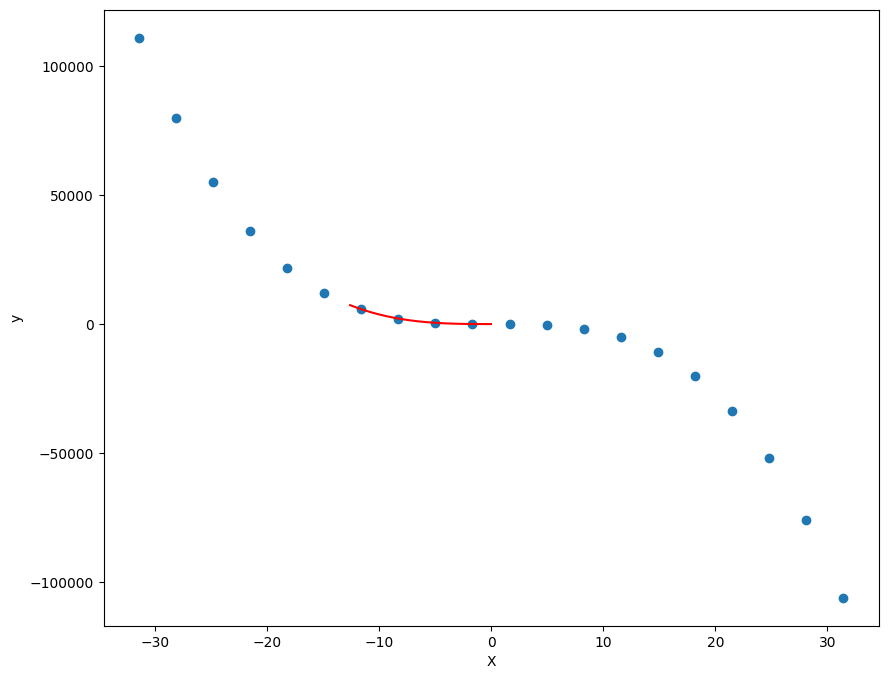

In [40]:
def f(x):
    return -3.5*x**3 + 2.5*x**2 -0.5*x + 1.4
x_values = np.linspace(-10*np.pi, 10*np.pi, 20)    ### 20 given x values
y_values = f(x_values)   ## corresponding y values
x = np.arange(-4*np.pi, 0, 0.01)
interpolated_values = lagrange_interpolation(x_values, y_values, x)
plt.figure(figsize= (10, 8))
plt.scatter(x_values, y_values)
plt.plot(x, interpolated_values, 'red', label= 'interpolated')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

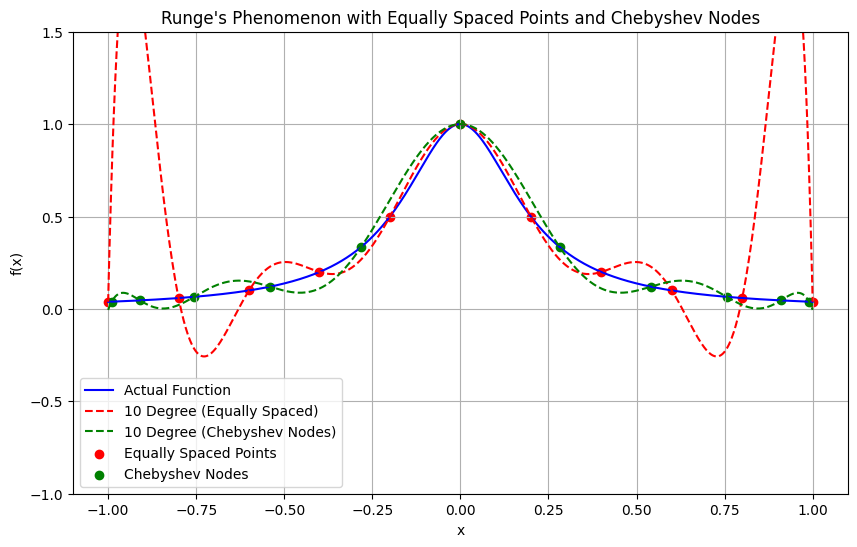

In [41]:
from scipy.interpolate import lagrange

def runge_function(x):
    return 1 / (1 + 25*x**2)

x_plot = np.linspace(-1, 1, 1000)
y_plot = runge_function(x_plot)

def equally_spaced_points(n):
    return np.linspace(-1, 1, n)

def chebyshev_nodes(n):
    return np.cos((2*np.arange(n) + 1) / (2*n)*np.pi)

def interpolate_and_plot(n, x_plot, y_plot, title):
    x_eq = equally_spaced_points(n)
    y_eq = runge_function(x_eq)
    x_ch = chebyshev_nodes(n)
    y_ch = runge_function(x_ch)
    
    poly_eq = lagrange(x_eq, y_eq)
    poly_ch = lagrange(x_ch, y_ch)
    
    y_interp_eq = poly_eq(x_plot)
    y_interp_ch = poly_ch(x_plot)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, y_plot, label="Actual Function", color="blue")
    plt.plot(x_plot, y_interp_eq, label=f"{n-1} Degree (Equally Spaced)", color="red", linestyle="--")
    plt.plot(x_plot, y_interp_ch, label=f"{n-1} Degree (Chebyshev Nodes)", color="green", linestyle="--")
    plt.scatter(x_eq, y_eq, color="red", label="Equally Spaced Points")
    plt.scatter(x_ch, y_ch, color="green", label="Chebyshev Nodes")
    plt.ylim(-1, 1.5)
    plt.legend()
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid()
    plt.show()
    
    
n = 11
interpolate_and_plot(n, x_plot, y_plot, "Runge's Phenomenon with Equally Spaced Points and Chebyshev Nodes")


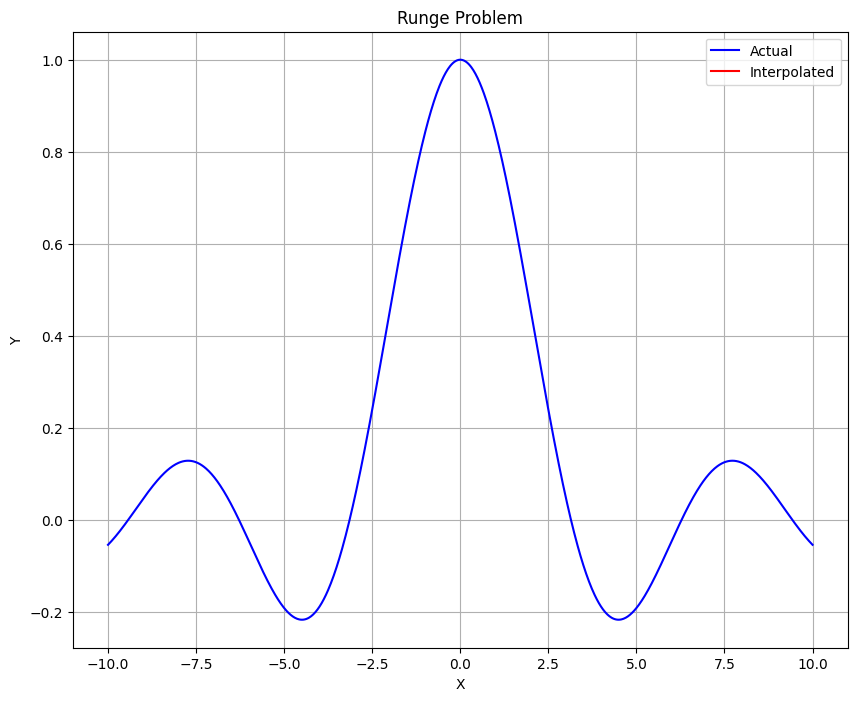

In [42]:
### using interpolation on curve sinx / x
f = lambda x: np.sin(x) / (x)
x = np.linspace(-10, 10, 1000)   ### 1000 given points
y = f(x)
x_inter = np.arange(-1, 1, 10)    ## 100 to interpolate
interpolated_values = lagrange_interpolation(x, y, x_inter)

plt.figure(figsize= (10, 8))
plt.plot(x,  y, 'blue', label= 'Actual')
plt.plot(x_inter, interpolated_values, 'red', label= 'Interpolated')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Runge Problem")
plt.legend()
plt.grid()
plt.show()

### Spline Interpolation

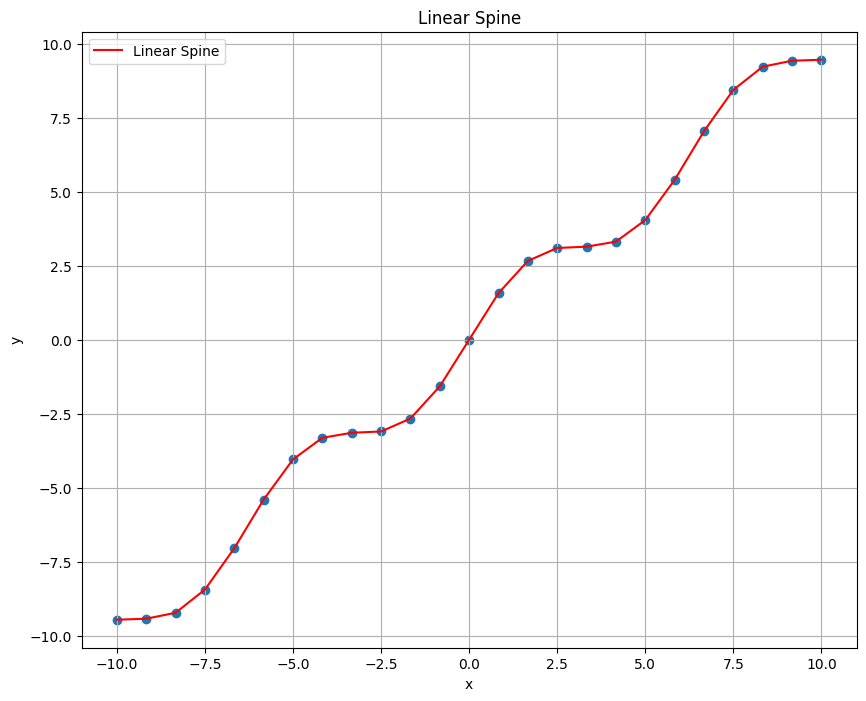

In [49]:
from scipy.interpolate import interp1d

def f(x):
    return np.sin(x) + x    ### define function
x = np.linspace(-10, 10, 25)  ## generating 25 x points
y = f(x)


spineLinear = interp1d(x, y, kind= 'linear')
plt.figure(figsize= (10, 8))
plt.scatter(x, y)
plt.plot(x, spineLinear(x), 'red', label= 'Linear Spine')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Spine")
plt.legend()
plt.grid()
plt.show()

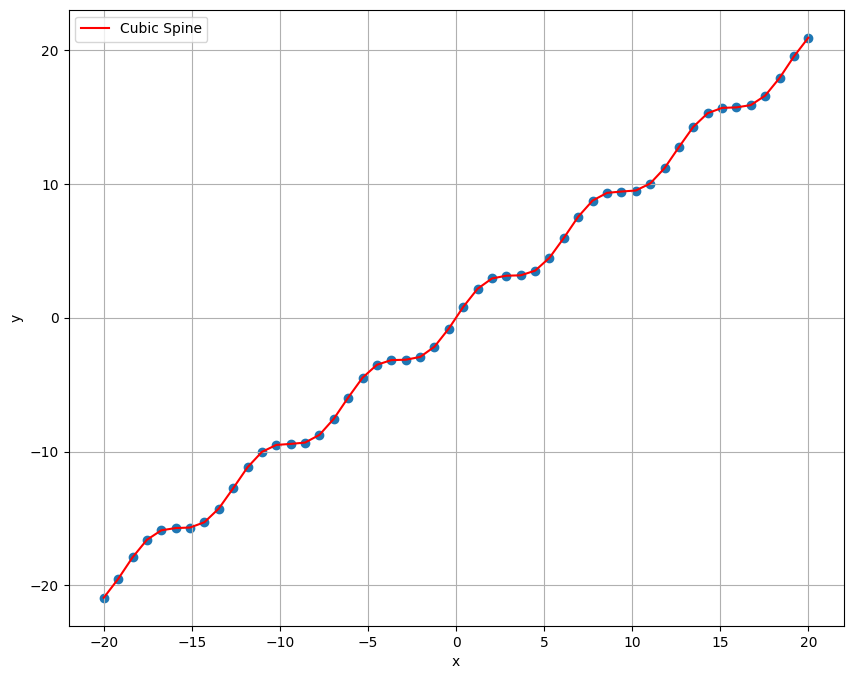

In [51]:
### Cubic spine
def f(x):
    return np.sin(x) + x    ### define function
x = np.linspace(-20, 20, 50)  ## generating 50 x points
y = f(x)


CubicSpine  = interp1d(x, y, kind= 'cubic')
plt.figure(figsize= (10, 8))
plt.scatter(x, y)
plt.plot(x, CubicSpine(x), 'red', label= 'Cubic Spine')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

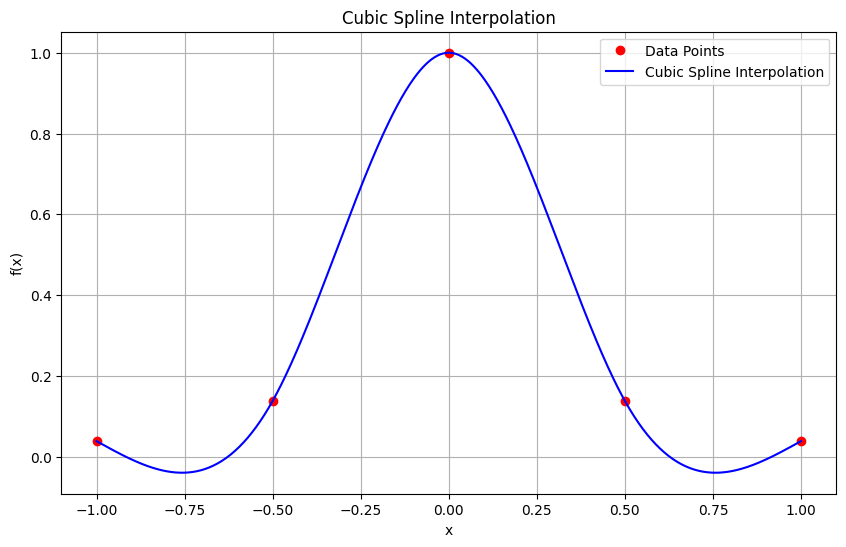

In [54]:
### Handling Non-Smooth data using cubic spine
from scipy.interpolate import CubicSpline

x_points = np.array([-1, -0.5, 0, 0.5, 1])
y_points = 1 / (1 + 25*x_points**2)

cubic_spine = CubicSpline(x_points,y_points, bc_type= 'natural')
x_smooth = np.linspace(-1, 1, 500)
y_smooth = cubic_spine(x_smooth)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_points, y_points, 'o', label="Data Points", color="red")
plt.plot(x_smooth, y_smooth, label="Cubic Spline Interpolation", color="blue")
plt.title("Cubic Spline Interpolation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

### Spline Interpolation for quantum oscillator

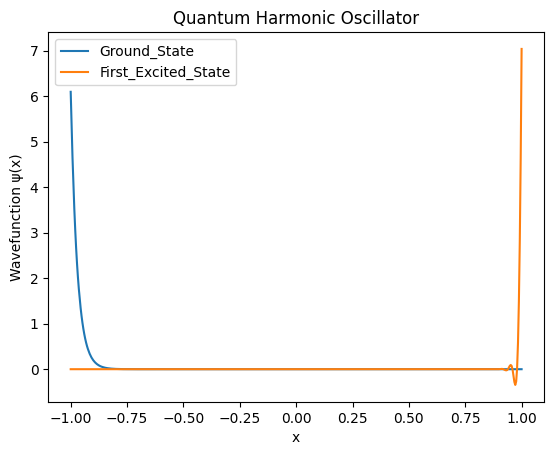

In [62]:
from scipy.linalg import eigh    ### for solving eigenvalues

hbar= 1.0   ## reduced plank constant
m = 1.0  ## mass of e
omega = 1.0   ## angular frequency
x_max= 1.0
n_points = 100
dx = 2*x_max / (n_points - 1)    ## grid spacing

## discretized x values
x = np.linspace(-x_max, x_max, n_points)

## potential
V = 0.5*m*omega**2 * x**2

## Hamiltnian matrix using FDM
H = np.zeros((n_points, n_points))
for i in range(1, n_points - 1):
    H[i, i] = hbar**2 / (m*dx**2) + V[i]
    H[i, i - 1] = -hbar**2 / (2 * m * dx**2)
    H[i, i + 1] = -hbar**2 / (2 * m * dx**2)
    
    
# Solve for eigenvalues and eigenvectors (energy levels and wavefunctions)
energies, wavefunctions = eigh(H)

## choose ground state
ground_state = wavefunctions[:, 0]
first_state = wavefunctions[:, 1]

## normalize it
ground_state /= np.sqrt(np.sum(ground_state**2)*dx)
first_state /= np.sqrt(np.sum(first_state**2)*dx)

## use cubic spline to interpolate for a smooth wavefunction
spline0 = CubicSpline(x, ground_state)
spline1 = CubicSpline(x, first_state)

# Plot the original and interpolated wavefunctions
x_smooth = np.linspace(-x_max, x_max, 500)
#plt.plot(x, ground_state, 'o', label="Discrete points")
plt.plot(x_smooth, spline0(x_smooth), '-', label="Ground_State")
plt.plot(x_smooth, spline1(x_smooth), '-', label="First_Excited_State")
plt.xlabel("x")
plt.ylabel("Wavefunction ψ(x)")
plt.title("Quantum Harmonic Oscillator")
plt.legend()
plt.show()